# Learning Langchain

### Prerequisite installs
```pip install langchain```

```pip install openai```

```pip install wikipedia```


### Setup

You will need to import OpenAI to use their models. It requires an environmental variable called 'OPENAI_API_KEY' with the API key value from https://platform.openai.com/account/api-keys.

In [1]:
from langchain.llms import OpenAI
from secret_keys import openai_key
import os
os.environ['OPENAI_API_KEY'] = openai_key

### How to use the llm object
Object that serves as the interface for interacting with a model via supplied prompt. This could be OpenAI, Bloom or even a custom LLM wrapper.


In [2]:
llm = OpenAI(temperature=0.6)
name = llm('I want to create a soccer team. Please give me a name suggestion for the team')
print(name)



FC Dynamo


### Prompt templates
Templates to pass to the LLM object to simplify prompt management. Input variables are defined in a list `input_variables` and used in the template with {variable_name} syntax.

In [27]:
from langchain.prompts import PromptTemplate

# Create the template
sport_team_prompt_template = PromptTemplate(
    input_variables=['sport'],
    template = "I want to create a {sport} team. Please give me a name suggestion for the team"
)

# Pass the input variables with format method
sport_team_prompt_template.format(sport='volleyball')



'I want to create a volleyball team. Please give me a name suggestion for the team'

### Chains
An object that is supplied the llm and prompt template objects and returns the output from the llm with the prompt supplied via template.

In [28]:
from langchain.chains import LLMChain

# Create the chain
sport_chain = LLMChain(llm=llm, prompt=sport_team_prompt_template)
sport_chain.run('Football')


'\n\nThe Night Hawks'

### Simple sequential chain
A way to run one chain after the other, taking input from one and supplying it to the next.


In [37]:
from langchain.chains import SimpleSequentialChain

# Create the first chain template
sport_team_prompt_template = PromptTemplate(
    input_variables=['sport'],
    template = "I want to create a {sport} team. Please give me a name suggestion for the team"
)

# Create the first chain object
sport_chain = LLMChain(llm=llm, prompt=sport_team_prompt_template)

# Create a second template
mascot_prompt_template = PromptTemplate(
    input_variables=['team_name'],
    template = "Give me a mascot idea for a team named {team_name}. Respond in 2-3 words"
)

# Pass the second template to a second chain object
mascot_chain = LLMChain(llm=llm, prompt=mascot_prompt_template)

# Create a simple sequential chain combining the two chains
ss_chain = SimpleSequentialChain(chains = [sport_chain, mascot_chain])
response = ss_chain.run('Volleyball')
print(response)



Volley Bear


### Sequential Chain
Creates a chain object that can utilize output keys to pass information. 

In [39]:
from langchain.chains import SequentialChain

# Create the first chain template
sport_team_prompt_template = PromptTemplate(
    input_variables=['sport'],
    template = "I want to create a {sport} team. Please give me a name suggestion for the team"
)

# Create the first chain object, this time adding an output_key
sport_chain = LLMChain(llm=llm, prompt=sport_team_prompt_template, output_key="team_name")

# Create a second template
mascot_prompt_template = PromptTemplate(
    input_variables=['team_name'],
    template = "Give me a mascot idea for a team named {team_name}. Respond in 2-3 words"
)

# Pass the second template to a second chain object, this time adding an output_key
mascot_chain = LLMChain(llm=llm, prompt=mascot_prompt_template, output_key="mascot")

chain = SequentialChain(
    chains=[sport_chain, mascot_chain],
    input_variables=['sport'],
    output_variables=['team_name', 'mascot']
)
chain({'sport': 'Soccer'})

{'sport': 'Soccer',
 'team_name': '\n\nFlaming Falcons',
 'mascot': '\n\nFire Phoenix.'}

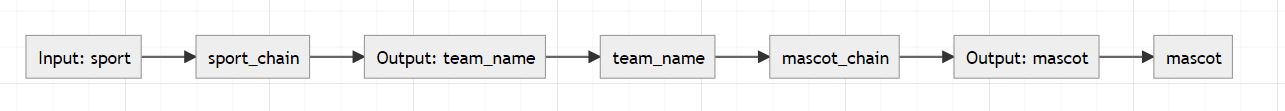

### Agents
 An agent has access to a suite of tools, and determines which ones to use depending on the user input. Agents can use multiple tools, and use the output of one tool as the input to the next.

In [46]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.llms import OpenAI

# Load the tools the agent will use
tools = load_tools(["wikipedia"], llm=llm)
# Initialize agent
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)
# Run the agent
agent.run('What is the tallest building in the world currently?')



> Entering new  chain...
 I should find out what the tallest building in the world is.
Action: Wikipedia
Action Input: Tallest building in the world
Observation: Page: List of tallest buildings
Summary: Tall buildings, such as skyscrapers, are intended here as enclosed structures with continuously occupiable floors and a height of at least 340 metres (1,120 ft). Such definition excludes non-building structures, such as towers.

Page: List of tallest buildings and structures
Summary: The world's tallest human-made structure is the 828-metre-tall (2,717 ft) Burj Khalifa in Dubai, United Arab Emirates. The building gained the official title of "tallest building in the world" and the tallest self-supported structure at its opening on January 9, 2010. The second-tallest self-supporting structure and the tallest tower in the world is the Tokyo Skytree. The tallest guyed structure is the KVLY-TV mast in North Dakota, USA at 606 metres (1,987 ft).
The Council on Tall Buildings and Urban Habi

'The tallest building in the world currently is the Burj Khalifa in Dubai, United Arab Emirates, which stands at 828 metres (2,717 ft).'